# yTub recombinant movie plots


In [1]:
# Loading in standard libraries and functions

### --- REMOVE PRINT FUNCTION: --- ### 

# Makes it so any variable or statement on it's own line gets printed w/o print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### --- IMPORT LIBRARIES: --- ###

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
#import altair as alt
import os
import glob
import matplotlib.patches as mpatches
# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline
import re

### --- CONJ 510 SUMMARY TABLES: --- ### 

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

#summary = fil.groupby('condition').agg(['mean', 'std', 'min', 'max', 'median', percentile(25), percentile(75), 'skew'])
#summary

### --- IMPORT SCIPY T TEST: --- ###

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

### --- IND. T-TEST FUNCTION: --- ###
# source: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

### --- 3D CARTESIAN DISTANCE FUNCTION: --- ###

# AB = sqrt((x2 - x1)^2  +   (y2 - y1)^2   +   (z2 - z1)^2)

def cart3D_dist(x1, x2, y1, y2, z1, z2):
    x_dif = x2-x1
    y_dif = y2-y1
    z_dif = z2-z1
    x_sqr = x_dif**2
    y_sqr = y_dif**2
    z_sqr = z_dif**2
    dist = sqrt(x_sqr + y_sqr + z_sqr)
    return dist

### --- FINDING UNIQUE COMBINATIONS FUNCTION: --- ###

# Based on the mathematical concept of finding unique combinations without selecting the same option again. 
# n is the dataset to be pulled from
# r is the number of data to select from the dataset 
def find_combos(n, r):
    return (math.factorial(n))/((math.factorial(r))*(math.factorial(n-r)))

### --- ANGLE BETWEEN TWO 2D LINES FUNCTION: --- ###

import math

# defining function for calculating angle of rotation between 2 2D lines
def find_angle(m1, m2): 
    angle = math.degrees(math.atan(abs((m1 - m2)/(1 + m1*m2))))
    return angle

### --- SLOPE BETWEEN TWO POINTS ON A 2D LINE FUNCTION: --- ###

# defining a function to calculate slope

def find_slope(y2, y1, x2, x1):
    m = (y2 - y1)/(x2 - x1)
    return m

### --- SET UP FOR A FIGURE: --- ###

# fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols = 2,
#                                                         nrows = 3,
#                                                         sharex = False,
#                                                         sharey = True,
#                                                         figsize = (40,50))

#titlefont = 40 # sets font size 
#axisfont = 30
#plt.rc('xtick', labelsize=25) 
#plt.rc('ytick', labelsize=25) 
#palette = ['#5DADE2', '#EC7063', '#F8C471']
#fig_title = 'ACD Timing in WT and pp4KO neuroblasts'


### --- SET UP FOR CUSTOM LEGENDS --- ###

#colors = ["g", "w"]
#texts = ["Green Data Description", "RedData Description"]
#patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
#plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), loc='center', ncol=2 )


### --- color palettes --- ###

# p = ['#3386FF', '#FF5733'] # classic blue and orange from the rotation saga
# ['#3386FF', '#143566', 'grey'] # hex codes for blue, dark blue, grey
# ['#FF5733', '#99341e', 'grey'] # hex codes for orange, dark orange, grey

### --- PLOT STYLES: --- ###

plt.style.use('fast') # uses seaborn style
#sns.set_style('white') # uses blank white background style (to copy PRISM)

### --- REMOVING DATAFRAME VIEW LIMITS --- ###
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Command line cells to ensure code is in right directory. 
1. The first cell calls `pwd`, which returns the current working directory that the code is working in. 
2. The second cell calls `ls`, which returns the list of files in the current directory.
3. The third cell sets the home directory to a variable, and sets the figure directory to another one.  

In [2]:
pwd

'/Users/rcsegura/Desktop/PP4_github/SuppFig5'

In [3]:
ls

SuppFig5 data.xlsx               ~$2024-12-03 Fig1 metadata.xlsx
SuppFig5.ipynb                   ~$Fig1 metadata.xlsx
readme.md                        ~$SuppFig5 data.xlsx


In [4]:
home_dir = '/Users/rcsegura/Desktop/PP4_github/SuppFig5' # home directory
#figs_dir = home_dir + '/figs/' # enable and make folder if figures are to be saved
#data_dir = home_dir + '/data/' # directory holding the data
#outs_dir = home_dir + '/output/' # directory to save any output csv files to 

## Calling in the data
- This script calls in the file called "2024-06-05 data for plots.xlsx". This data is comprised of manually selected values from the metadata master file, which is titled "2024-12-03 Fig1 metadata.xlsx".
- This manually created dataframe has the columns `Genotype`, `phase`, `AC/Cyto Ratio`, and `AC/BC Ratio`, which will be used for plotting.
- This cell calls in the data and asigns it to the variable `data` and prints the first 5 rows using `.head(5)`. 

In [5]:
# reading in data
os.chdir(home_dir)
data = pd.read_excel('SuppFig5 data.xlsx')
data.head(5)

,file name,genotype,phase,Nb#,Unnamed: 4,AC RFP,BC RFP,Cyto RFP,Unnamed: 8,AC RFP sub,BC RFP sub,Cyto RFP sub,Unnamed: 12,AC/Cyto,BC/Cyto,AC/BC
0,2025-01-27_1_F3,"yTub23C[A15-2], yTub37C[3]",interphase,1.0,NaN,182.0,152.0,150.0,NaN,82.0,52.0,50.0,NaN,1.640000,1.040000,1.576923
1,NaN,"yTub23C[A15-2], yTub37C[3]",prometaphase,1.0,NaN,300.0,233.0,152.0,NaN,200.0,133.0,52.0,NaN,3.846154,2.557692,1.503759
2,NaN,"yTub23C[A15-2], yTub37C[3]",interphase,2.0,NaN,171.0,168.0,130.0,NaN,71.0,68.0,30.0,NaN,2.366667,2.266667,1.044118
3,NaN,"yTub23C[A15-2], yTub37C[3]",prometaphase,2.0,NaN,230.0,207.0,132.0,NaN,130.0,107.0,32.0,NaN,4.062500,3.343750,1.214953
4,NaN,"yTub23C[A15-2], yTub37C[3]",interphase,3.0,NaN,185.0,157.0,150.0,NaN,85.0,57.0,50.0,NaN,1.700000,1.140000,1.491228


## Plotting the data: Figure 1D, AC/Cytoplasm. 
- This cell takes the data in `data` and plots it using `seaborn`.
- The first couple lines set the parameters for the axes and title sizes, and the palette being used.
- The plot is made by first using `sns.stripplot()` to make a scatterplot of the data, and then a boxplot is overlayed on the data using `sns.boxplot()`.
- An unpaired student's T-test is done using the function made at the head of this notebook, and annotations are done to the plot to show the p-value for comparisons between `WT` and `PP4KO`.
- The resulting figure is then saved to the home directory.
- The figure was then further edited in Adobe Illustrator for stylistic preferences. 

/Applications/anaconda3/envs/tester/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Applications/anaconda3/envs/tester/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Applications/anaconda3/envs/tester/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


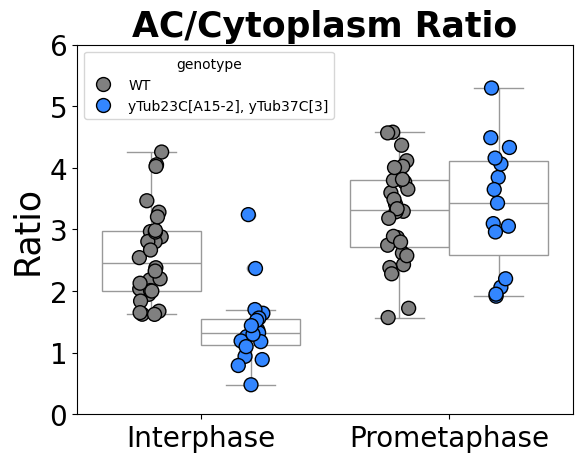

In [6]:
# plotting

p = ['grey', '#3386FF'] # sets palette
axes_title = 25 # axes title size
tick_size = 20 # axes tick size
title = 'AC/Cytoplasm Ratio' # graph title
title_size = 25 # graph title size

# generates stripplot
sns.stripplot(data = data, x = 'phase', y = 'AC/Cyto',
             hue = 'genotype', dodge = True,
             hue_order = ['WT', 'yTub23C[A15-2], yTub37C[3]'], palette = p,
             size = 10, edgecolor = 'k', linewidth = 1,
             legend = True)

# generates boxplots
sns.boxplot(data = data, x = 'phase', y = 'AC/Cyto',
             hue = 'genotype', dodge = True,
             hue_order = ['WT', 'yTub23C[A15-2], yTub37C[3]'], palette = ['w', 'w'], 
           legend = False)

plt.xlabel('') # removes x axis label
plt.ylabel('Ratio', fontsize = axes_title) # modifies y axis label
plt.xticks(labels = ['Interphase', 'Prometaphase'], ticks = [0,1], size = tick_size) # manually changes x-tick titles
plt.yticks(size = tick_size) # sets y-tick size to match assigned value
plt.ylim(0,6) # sets y-axis limit
plt.title(title, fontsize = title_size, fontweight = 'bold') # sets title parameters

#stats and annotations
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/Cyto'].dropna()
param2 = data[(data['genotype']=='PP4KO') & (data['phase']=='interphase')]['AC/Cyto'].dropna()
w = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 10)
plt.annotate(f"p-val = {w}", xy = (0.2, param2.max()+1), ha = 'center')

param3 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['AC/Cyto'].dropna()
param4 = data[(data['genotype']=='PP4KO') & (data['phase']=='prometaphase')]['AC/Cyto'].dropna()
x = np.round(independent_ttest(param3, param4, 0.05)[3], decimals = 3)
plt.annotate(f"p-val = {x}", xy = (1.2, param4.max()+0.2), ha = 'center')

# saving figure
#os.chdir(figs_dir)
#plt.savefig('AC-Cytoplasm Ratio, WT and recomb.png', dpi = 600, bbox_inches = 'tight')
#plt.savefig('AC-Cytoplasm Ratio, WT and recomb.svg', dpi = 600, bbox_inches = 'tight')
plt.show(); # shows figure in notebook

## Plotting the data: Figure 1C, AC/BC. 

/Applications/anaconda3/envs/tester/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Applications/anaconda3/envs/tester/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Applications/anaconda3/envs/tester/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


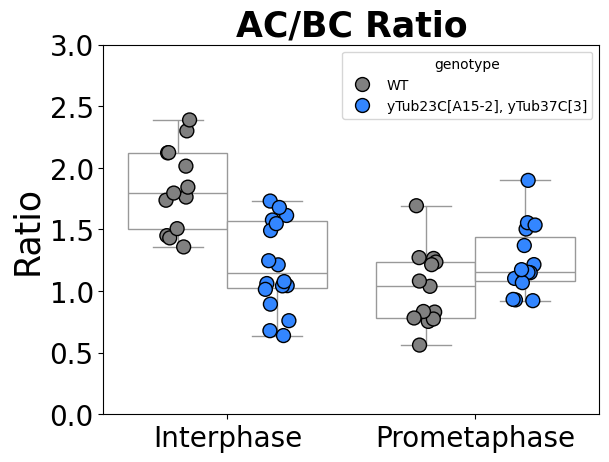

In [7]:
# plotting

p = ['grey', '#3386FF'] # sets palette
axes_title = 25 # axes title size
tick_size = 20 # axes tick size
title = 'AC/BC Ratio' # graph title
title_size = 25 # graph title size

# generates stripplot
sns.stripplot(data = data, x = 'phase', y = 'AC/BC',
             hue = 'genotype', dodge = True,
             hue_order = ['WT', 'yTub23C[A15-2], yTub37C[3]'], palette = p,
             size = 10, edgecolor = 'k', linewidth = 1,
             legend = True)

# generates boxplots
sns.boxplot(data = data, x = 'phase', y = 'AC/BC',
             hue = 'genotype', dodge = True,
             hue_order = ['WT', 'yTub23C[A15-2], yTub37C[3]'], palette = ['w', 'w'], 
           legend = False)

plt.xlabel('') # removes x axis label
plt.ylabel('Ratio', fontsize = axes_title) # modifies y axis label
plt.xticks(labels = ['Interphase', 'Prometaphase'], ticks = [0,1], size = tick_size) # manually changes x-tick titles
plt.yticks(size = tick_size) # sets y-tick size to match assigned value
plt.ylim(0,3) # sets y-axis limit
plt.title(title, fontsize = title_size, fontweight = 'bold') # sets title parameters

#stats and annotations
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/BC'].dropna()
param2 = data[(data['genotype']=='PP4KO') & (data['phase']=='interphase')]['AC/BC'].dropna()
w = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 10)
plt.annotate(f"p-val = {w}", xy = (0.2, param2.max()+1), ha = 'center')

param3 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['AC/BC'].dropna()
param4 = data[(data['genotype']=='PP4KO') & (data['phase']=='prometaphase')]['AC/BC'].dropna()
x = np.round(independent_ttest(param3, param4, 0.05)[3], decimals = 3)
plt.annotate(f"p-val = {x}", xy = (1.2, param4.max()+0.2), ha = 'center')

# saving figure
#os.chdir(figs_dir)
#plt.savefig('AC-Cytoplasm Ratio, WT and PP4KO.png', dpi = 600, bbox_inches = 'tight')
#plt.savefig('AC-BC Ratio, WT and recomb.svg', dpi = 600, bbox_inches = 'tight')
plt.show(); # shows figure in notebook

# Stats Table

In [8]:
stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                      'control n', 'experimental n',
                                      'control mean', 'experimental mean',
                                     'control stdev', 'experimental stdev',
                                     'test statistic', 'degrees of freedom', 
                                     'critical value', 'p-value'])

pd.set_option('display.float_format', '{:.2E}'.format) # enables scientific notation

stats_table

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

# Set up the stats table
stats_table = pd.DataFrame(columns=['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                    'control n', 'experimental n',
                                    'control mean', 'experimental mean',
                                    'control stdev', 'experimental stdev',
                                    'test statistic', 'degrees of freedom', 
                                    'critical value', 'p-value', 'significance'])

pd.set_option('display.float_format', '{:.2E}'.format)  # Scientific notation for p-values

# List of tests to iterate through
tests = [
    ['WT', 'yTub23C[A15-2], yTub37C[3]', 'interphase', 'AC/Cyto'],
    ['WT', 'yTub23C[A15-2], yTub37C[3]', 'prometaphase', 'AC/Cyto'],
    ['WT', 'yTub23C[A15-2], yTub37C[3]', 'interphase', 'AC/BC'],
    ['WT', 'yTub23C[A15-2], yTub37C[3]', 'prometaphase', 'AC/BC']
]

# Function to determine appropriate test
def is_parametric(data1, data2, alpha=0.05):
    # Check if data is numeric
    continuous = all(isinstance(x, (int, float)) for x in data1) and \
                 all(isinstance(x, (int, float)) for x in data2)
    if not continuous:
        return {'suitable_for_ttest': False, 'suggested_test': "Mann-Whitney U test"}

    # Shapiro-Wilk test for normality
    normality1 = shapiro(data1).pvalue > alpha
    normality2 = shapiro(data2).pvalue > alpha
    normality = normality1 and normality2

    # Levene's test for equal variances
    equal_variance = levene(data1, data2).pvalue > alpha

    # Determine if suitable for t-test
    suitable_for_ttest = normality and equal_variance
    suggested_test = "t-test" if suitable_for_ttest else "Mann-Whitney U test"

    return {'suitable_for_ttest': suitable_for_ttest, 'suggested_test': suggested_test}

# Iterate through tests
for i, test_params in enumerate(tests):
    control_var, experimental_var, phase, y_value = test_params

    # Subset data for the current test
    param1 = data[(data['genotype'] == control_var) & (data['phase'] == phase)][y_value].dropna()
    param2 = data[(data['genotype'] == experimental_var) & (data['phase'] == phase)][y_value].dropna()

    # Populate descriptive stats
    stats_table.loc[i, 'control variable'] = control_var
    stats_table.loc[i, 'experimental variable'] = experimental_var
    stats_table.loc[i, 'phase'] = phase
    stats_table.loc[i, 'y-value'] = y_value
    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)
    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()
    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    # Determine appropriate test
    test_result = is_parametric(param1, param2)
    suggested_test = test_result['suggested_test']

    if suggested_test == "t-test":
        t_stat, p_value = ttest_ind(param1, param2)
        stats_table.loc[i, 'test'] = "Unpaired Student's T-test"
        stats_table.loc[i, 'test statistic'] = t_stat
        stats_table.loc[i, 'degrees of freedom'] = len(param1) + len(param2) - 2
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this summary
    else:
        u_stat, p_value = mannwhitneyu(param1, param2, alternative='two-sided')
        stats_table.loc[i, 'test'] = "Mann-Whitney U Test"
        stats_table.loc[i, 'test statistic'] = u_stat
        stats_table.loc[i, 'degrees of freedom'] = "N/A"  # Not applicable for this test
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this test

    # Record p-value in scientific notation
    stats_table.loc[i, 'p-value'] = f"{p_value:.5e}"

    # Add significance stars
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig

# Display the stats table
stats_table
# saves output stats table
#os.chdir(outs_dir)
stats_table.to_csv('SuppFig5 stats.csv')
os.chdir(home_dir)

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,"yTub23C[A15-2], yTub37C[3]",interphase,Mann-Whitney U Test,AC/Cyto,28,18,2.59E+00,1.41E+00,7.56E-01,6.15E-01,4.62E+02,N/A,N/A,2.41340e-06,****
1,WT,"yTub23C[A15-2], yTub37C[3]",prometaphase,Unpaired Student's T-test,AC/Cyto,28,15,3.26E+00,3.37E+00,7.95E-01,1.03E+00,-3.93E-01,41,N/A,6.96227e-01,ns
2,WT,"yTub23C[A15-2], yTub37C[3]",interphase,Mann-Whitney U Test,AC/BC,13,18,1.83E+00,1.33E+00,3.40E-01,6.55E-01,1.98E+02,N/A,N/A,1.27042e-03,**
3,WT,"yTub23C[A15-2], yTub37C[3]",prometaphase,Unpaired Student's T-test,AC/BC,13,15,1.03E+00,1.24E+00,3.07E-01,2.77E-01,-1.98E+00,26,N/A,5.85985e-02,ns


# Bar plots

In [10]:
data = pd.read_excel('SuppFig5 data.xlsx', sheet_name = "Sheet2")
data.head(5)

,genotype,phenotype,count,percent
0,WT,1X,51,1.00E+00
1,WT,0X,0,0.00E+00
2,"yTub23C,yTub37C",1X,6,2.31E-01
3,"yTub23C,yTub37C",0X,20,7.69E-01


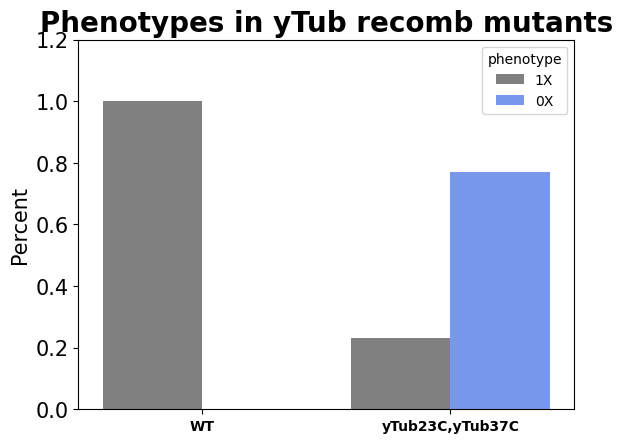

In [11]:
colors = ['grey', '#648FFF']

sns.barplot(x = 'genotype', y = 'percent', data = data,
           hue = 'phenotype', dodge = True, palette = colors)

plt.xticks(rotation = 0, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Percent', fontsize = 15)
plt.yticks(size = 15)
plt.title('Phenotypes in yTub recomb mutants', fontsize = 20, fontweight = 'bold')
plt.ylim(0,1.2)
#plt.savefig('yTub recomb mutant counts.svg', dpi = 600,  bbox_inches = 'tight')
plt.show();

